# Neural Network - extra assignment

# 1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.style as style
style.use('bmh')

# 2. Calculating the book example


We first try to understand the example given in the book, eChapter 7, page 15 to make sure we understand how the different steps are performed.

In [2]:
# Forward propagation
def theta(s):
    return np.tanh(s)


def book_example():
    # We calculate example 7.1 from the book
    W1 = np.array([[0.1, 0.2], [0.3, 0.4]])
    W2 = np.array([[0.2], [1], [-3]])
    W3 = np.array([[1], [2]])
    y = np.array([[1]])

    print('The weights are initially set to:\n')

    for i in [1,2,3]:
        print('W{}'.format(i))
        print(eval('W{}'.format(i)), end='\n\n')
        

    
    #---------------------

    print("\n----------------\n")
    print("input x0:")
    x0 = np.array([[1], [2]])        # input
    print(x0)

    #---------------------

    print("\ncompute s1 = W1.T x0")
    s1 = np.dot(W1.T, x0)
    print(s1)

    #---------------------

    print("\ncompute x1 = [1, theta(s1)]:")
    x1 = np.vstack((np.array([1]), theta(s1)))
    print(x1)

    #---------------------

    print("\ncompute s2 = W2.T x1")
    s2 = np.dot(W2.T, x1)
    print(s2)

    #---------------------

    print("\ncompute x2 = [1, theta(s2)]:")
    x2 = np.vstack((np.array([1]), theta(s2)))
    print(x2)

    #---------------------

    print("\ncompute s3 = W3.T x2")
    s3 = np.dot(W3.T, x2)
    print(s3)

    #---------------------

    print("last layer and output, that's why no bias = 1 node")
    print("\ncompute x3 = theta(s3)")
    x3 = theta(s3)
    print(x3)

    #XXXXXXXXXXXXXXXXXXXXXXXXXX

    print('\nBACKPROPAGATION')

    # Initialization of delta, see eChapter 7, page 14

    print('\ncompute delta3:')
    delta3 = 2*(x3 - y)*(1-x3**2)
    print(delta3)

    # Compute delta2, see eChapter 7, page 14
    print('\ncompute delta2:')
    part1 = (1 - x2**2)[1:] 
    part2 = (np.dot(W3, delta3))[1:]
    delta2 = part1 * part2
    print(delta2)

    # Compute delta1, see eChapter 7, page 14
    print('\ncompute delta1:')
    delta1 = (1-x1**2)[1:] * np.dot(W2, delta2)[1:]
    print(delta1)

    #------------------------------------

    # GRADIENT -> partial derivatives; eChapter 7, page 12,
    # equation (7.4)
    # de/dW^(l) = x^(l-1) (delta^(l))^T <--- outer product (matrix)

    # partial derivatives of e with respect to W1:
    # de/dW^(1) = x^(0) (delta^(1))^T

    print('\ncompute gradient of e with respect to W1:')
    grad_W1 = np.dot(x0, delta1.T)
    print(grad_W1)

    #......................................

    # partial derivatives of e with respect to W2:
    # de/dW^(2) = x^(1) (delta^(2))^T

    print('\ncompute gradient of e with respect to W2:')
    grad_W2 = np.dot(x1, delta2.T)
    print(grad_W2)

    #......................................

    # partial derivatives of e with respect to W2:
    # de/dW^(3) = x^(2) (delta^(3))^T

    print('\ncompute gradient of e with respect to W3:')
    grad_W3 = np.dot(x2, delta3.T)
    print(grad_W3)

    
book_example()

The weights are initially set to:

W1
[[ 0.1  0.2]
 [ 0.3  0.4]]

W2
[[ 0.2]
 [ 1. ]
 [-3. ]]

W3
[[1]
 [2]]


----------------

input x0:
[[1]
 [2]]

compute s1 = W1.T x0
[[ 0.7]
 [ 1. ]]

compute x1 = [1, theta(s1)]:
[[ 1.        ]
 [ 0.60436778]
 [ 0.76159416]]

compute s2 = W2.T x1
[[-1.48041469]]

compute x2 = [1, theta(s2)]:
[[ 1.        ]
 [-0.90154565]]

compute s3 = W3.T x2
[[-0.80309131]]
last layer and output, that's why no bias = 1 node

compute x3 = theta(s3)
[[-0.66576144]]

BACKPROPAGATION

compute delta3:
[[-1.85486437]]

compute delta2:
[[-0.69451848]]

compute delta1:
[[-0.44083838]
 [ 0.87503983]]

compute gradient of e with respect to W1:
[[-0.44083838  0.87503983]
 [-0.88167675  1.75007965]]

compute gradient of e with respect to W2:
[[-0.69451848]
 [-0.41974459]
 [-0.52894122]]

compute gradient of e with respect to W3:
[[-1.85486437]
 [ 1.67224491]]


# 3. Implement Neural Network class

In [3]:
import numpy as np


class NeuralNetwork:
    
    def __theta(self, s):
        return np.tanh(s)
    
    def __init__(self, d, random_range=1):
        '''
        d : architecture array containing number of nodes of each layer 
            (not counting the bias node)
            example: d = [1, 2, 1, 1]
        '''
        self.d = d
        self.L = len(self.d) - 1      # number of layers
        self.s = [None for i in range(len(self.d))]
        self.x = [None for i in range(len(self.d))]  # include bias node
        self.random_range = random_range
        self.W = self.__create_weight_matrices()
        self.delta = [None for i in range(len(self.d))]
        self.gradient = self.__create_gradient_matrices()
        self.eta = None
        
            
    def __create_weight_matrices(self):
        '''
        example: d = [1, 2, 1, 1]
              => 3 weight matrices
        '''
        matrices = [None for i in range(len(self.d))]
        for layer in range(1, len(self.d)):
            matrices[layer] = np.random.uniform(-self.random_range,self.random_range, (self.d[layer-1]+1, self.d[layer]))
        return matrices
    
    
    def __create_gradient_matrices(self):
        '''
        example: d = [1, 2, 1, 1]
              => 3 gradient matrices
        '''
        matrices = [None for i in range(len(self.d))]
        for layer in range(1, len(self.d)):
            matrices[layer] = np.zeros((self.d[layer-1]+1, self.d[layer]))
        return matrices
    
    
    def feedforward(self, x_input):
        self.x[0] = np.array(x_input)
        for layer in range(1, self.L+1):
            #print("\n\nself.W[{}].T = {}".format(layer, self.W[layer].T))
            #print("\nself.x[{}] = {}".format(layer-1, self.x[layer - 1]))
            self.s[layer] = np.dot(self.W[layer].T, self.x[layer - 1])
            self.x[layer] = np.r_[np.array([1]).reshape(1,1), self.__theta(self.s[layer]).reshape(self.s[layer].shape[0],1)]
        self.x[self.L] = (self.x[self.L])[1:]
    
    
    def backpropagate(self, y, eta):
        self.eta = eta
        # calculate deltas
        # initialization 
        #print("Starting backpropagation...")
        self.delta[self.L] = 2 * (self.x[self.L] - y) * (1 - (self.x[self.L])**2)
        #print("shape of delta[self.L]: ", self.delta[self.L].shape)
        #print("delta[self.L] = ", self.delta[self.L])
        #print("\n-----------\n")
        
        for layer in range(self.L-1, 0, -1):
            self.delta[layer] = (1 - self.x[layer]**2)[1:] * np.dot(self.W[layer + 1], self.delta[layer + 1])[1:]
            #print("\nshape of self.W[{}]: ".format(layer + 1))
            #print(self.W[layer + 1].shape)
            #print("\nshape of self.delta[{}]: ".format(layer + 1))
            #print(self.delta[layer + 1].shape)
            #print("---------------")
            
    def compute_gradient(self, N):
        # compute gradient (full batch)
        for layer in range(1,self.L + 1):
            self.gradient[layer] = self.gradient[layer] + 1/N * np.dot(self.x[layer-1], self.delta[layer].T)
        
    def update(self, N):                          # update weight vectors
        for layer in range(1, self.L + 1):
            self.W[layer] = self.W[layer] - self.eta * self.gradient[layer]

# 4. Testing Neural Network class with book example

In [4]:
def test_neural_network_class():
    
    # let's test our neural network class 
    # again with the book example
    
    NN = NeuralNetwork([1, 2, 1, 1])

    print("Size of weight matrices:")
    for i in range(1, 4):
        print(NN.W[i].T.shape)

    print('\n------------------------\n')

    print("\nWeight matrices initialized with random values:")
    for i in range(1, 4):
        print(NN.W[i])
        print()

    print('\n------------------------\n')

    
    print("\nSetting the initial weights manually...")
    NN.W[1] = np.array([[0.1, 0.2],
                        [0.3, 0.4]])

    NN.W[2] = np.array([0.2, 1, -3]).reshape(3,1)

    NN.W[3] = np.array([1,2]).reshape(2,1)


    print('\n------------------------\n')

    print("\nWeight matrices:")
    for i in range(1, 4):
        print("\nW[{}]".format(i))
        print(NN.W[i])


    print('\n------------------------\n')

    # note that the input_x vector includes the bias node!
    input_x = np.array([1,2]).reshape(2,1)
    NN.feedforward(input_x)
    

    print("\nOutputs:")
    for i in range(4):
        print("\nx[{}]".format(i))
        print(NN.x[i])


    print('\n------------------------\n')

    print("\nSignal:")
    for i in range(4):
        print("\ns[{}]".format(i))
        print(NN.s[i])

    print('\n------------------------\n')
    print('\n------------------------\n')
    
    y = 1            # label
    eta = 0.01       # learning rate
    
    print("final output from last layer of neural network:")
    E_in = (NN.x[NN.L] - y)**2
    print("NN.x[NN.L]: ", NN.x[NN.L])
    print("y = ", y)
    print("Mean squared error E_in = :", E_in)
    
    
    print('\n------------------------\n')
    print('\n------------------------\n')
    
    
    
    print("\nBACKPROPAGATION\n")
    NN.backpropagate(y, eta)

    print('\n------------------------\n')
    
    
    print("\nDeltas:")
    for i in range(4):
        print("\ndelta[{}]".format(i))
        print(NN.delta[i])
        
    print('\n------------------------\n')
    
    NN.compute_gradient(1)    # only 1 data point here
    
    print('\n------------------------\n')
    
    
    print("\nGradient:")
    for i in range(4):
        print("\nGradient[{}]".format(i))
        print(NN.gradient[i])
    
    print('\n------------------------\n')

    NN.update(1)
    
    print('\n------------------------\n')
    
    print("\nnew weight matrices after gradient update:")
    for i in range(1, 4):
        print("\nW[{}]".format(i))
        print(NN.W[i])
    
    RUNS = 10
    
    print()
    for t in range(1, RUNS + 1):
        # for each data point
        NN.feedforward(input_x)
        
        E_in = (NN.x[NN.L] - y)**2
        
        if t % (RUNS / 10) == 0:
            print("Iteration {}, error E_in = {}".format(t, E_in))
        
        NN.backpropagate(y, eta)
        NN.compute_gradient(1)
        NN.update(1)
        
    
#-------------

test_neural_network_class()

Size of weight matrices:
(2, 2)
(1, 3)
(1, 2)

------------------------


Weight matrices initialized with random values:
[[-0.7779056   0.07313646]
 [ 0.76644529 -0.64504041]]

[[-0.69968524]
 [ 0.4104005 ]
 [-0.1267731 ]]

[[ 0.07404565]
 [-0.48863761]]


------------------------


Setting the initial weights manually...

------------------------


Weight matrices:

W[1]
[[ 0.1  0.2]
 [ 0.3  0.4]]

W[2]
[[ 0.2]
 [ 1. ]
 [-3. ]]

W[3]
[[1]
 [2]]

------------------------


Outputs:

x[0]
[[1]
 [2]]

x[1]
[[ 1.        ]
 [ 0.60436778]
 [ 0.76159416]]

x[2]
[[ 1.        ]
 [-0.90154565]]

x[3]
[[-0.66576144]]

------------------------


Signal:

s[0]
None

s[1]
[[ 0.7]
 [ 1. ]]

s[2]
[[-1.48041469]]

s[3]
[[-0.80309131]]

------------------------


------------------------

final output from last layer of neural network:
NN.x[NN.L]:  [[-0.66576144]]
y =  1
Mean squared error E_in = : [[ 2.77476116]]

------------------------


------------------------


BACKPROPAGATION


---------------

## 4.1 Testing how to glue numpy arrays together

In [5]:
def test_glue_arrays_together():
    
    A = np.c_[np.array([1,2,3]), np.array([4,5,6])]
    print(A)
    print()

    B = np.r_[np.array([1,2,3]).reshape(3,1), np.array([4,5,6]).reshape(3,1)]
    print(B)
    print()
    
    C = np.r_[np.array([1]).reshape(1,1), np.array([4,5,6]).reshape(3,1)]
    print(C)
    print()
    
test_glue_arrays_together()

[[1 4]
 [2 5]
 [3 6]]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

[[1]
 [4]
 [5]
 [6]]



## 4.2 Testing how to square and prune numpy array

In [6]:
def test_array_square_and_prune():

    x = np.array([1,2,23])
    print(1 - x**2)

    print((1 - x**2)[1:])
    
test_array_square_and_prune()

[   0   -3 -528]
[  -3 -528]


# 5. Training the neural network

We will use the training set `in.dta` and the test set `out.dta`. We choose an architecture with a **single hidden layer** with $d^{(1)} = 4$ neurons (not including the bias node) in the hidden layer, a learning rate of $\eta = 0.1$ and a range of $(-0.2, 0.2)$ for the random weights in the initialization.

The parameters that we can test are:

- $d^{(1)} = 1,2,3,4,5$
- $\eta = 1, 0.1, 0.01$
- range for random weight initialization: $(-0.02, 0.02), (-0.2, 0.2), (2,2)$

For the architecture we have the following: 

- We need two input neurons for the input (x1, x2).
- We chose $d^{(1)}$ neurons in the hidden layer.
- We have 1 output neuron in the last layer.
- This results in the architecture $d = [d^{(0)}, d^{(1)}, d^{(2)}] = [2, d^{(1)}, 1]$

In [7]:
def extra_problem(d1 = 4, eta = 0.1, rand_range = 0.2):
    
    # read data
    df = pd.read_csv("in.dta", names = ["x1", "x2", "y"], sep="\s+")
    df_test = pd.read_csv("out.dta", names = ["x1", "x2", "y"], sep="\s+")
    #print("size of df_test: ", df_test.size)
    #print("dataframe shape: ", df.shape)
    #print("dataframe:")
    #print(df.head(5))

    X_train = np.c_[df["x1"], df["x2"]]
    y_train = df["y"]
    N_train = X_train.shape[0]

    
    X_test = np.c_[df_test["x1"], df_test["x2"]]
    y_test = df_test["y"]
    N_test = X_test.shape[0]
    
    #print("\nX_train.shape = ", X_train.shape)
    #print("y_train.shape = ", y_train.shape)
    
    #----------------------------
    
    # create neural network object
    print("\nInitializing network...\n")
    #NN = NeuralNetwork([2, 5, 1], random_range = 0.2)
    #d1 = 5
    #rand_range = .2
    
    # We need two input neurons for the input (x1, x2),
    # we chose d1 neurons in the hidden layer
    # we have 1 output neuron in the last layer
    NN = NeuralNetwork([2, d1, 1], random_range = rand_range)
    
    
    #eta = .01
    #print("\nWeights:")
    #print(NN.W)
    
    #print("layer architecture:")
    #print(NN.d)
    
    #print('\n------------------------\n')

    #print("\nWeight matrices initialized with random values:")
    #for i in range(1, 3):
    #    print(NN.W[i].T)
    #    print()

    #print('\n------------------------\n')
    
    print("\nStarting training...\n")
    MAX_EPOCHS = 1000                        # maximum number of epochs
    E_in_values = []
    E_out_values = []
    required_epochs = None
    
    for t in range(MAX_EPOCHS + 1):
        
        E_in = 0
        E_out = 0
        
        for i in range(N_train):
            # for each data point construct
            # input vector containing bias node, so add a 1 to your vector!
            input_x = np.r_[np.array([1]).reshape(1,1), X_train[i, :].reshape(2,1)]
            y = y_train[i]
            
            #----------------------
            
            #print("\nFeedforward:")
            #print(input_x.shape)
            NN.feedforward(input_x)
            
            #print("data point number= {} => mean squared error = {}".format(i, (NN.x[NN.L] - y)**2))
            E_in += ((NN.x[NN.L])[0][0] - y)**2
        
            #--------------------
            
            # backpropgate and compute gradient
            NN.backpropagate(y, eta)
            NN.compute_gradient(N_train)
        
            #----------------------
        
        
        # feeding test data for E_out
        for i in range(N_test):

            input_xi_test = np.r_[np.array([1]).reshape(1,1), X_test[i, :].reshape(2,1)]
            yi_test = y_test[i]
            
            NN.feedforward(input_xi_test)
            E_out += ((NN.x[NN.L])[0][0] - yi_test)**2    # Mean square error
            
            

        #--------------------
        
        
        
        E_in /= N_train
        E_in_values.append(E_in)
        
        E_out /= N_test
        E_out_values.append(E_out)
        
        #if t % (RUNS / 10) == 0:
        #print("Iteration {}, error E_in = {}".format(t, E_in))
        
        NN.update(N_train)
    
        #if E_in < 0.001:
        #    print("\nNumber of iterations: ", t)
        #    break
        
        # consider the last 100 values of E_in and stop, if each of those values
        # is less than the threshold 0.0001
        num_past_values = 100
        last_E_in_values = E_in_values[-num_past_values:]
        if all([value < 0.0001 for value in last_E_in_values]):
            required_epochs = t
            break
    
    print("last 10 E_in values: ", last_E_in_values[-10:])
    
    fig1 = plt.figure(1, dpi = 120)
    plt.plot(E_in_values, 'r-', label='$E_{in}$')
    plt.plot(E_out_values, 'b-', label='$E_{out}$')
    plt.xlabel("epochs")
    plt.ylabel("mean square error")
    plt.title("Neural Network training with\n $d^1={}, \eta={}, random range=(-{},{})$".format(d1, eta, rand_range, rand_range))
    plt.legend()
    plt.show()
    
    
    if not required_epochs:
        required_epochs = 999999*t      # I'm penalizing if the algorithm doesn't get below the error threshold in less than 1000
    return required_epochs           # epochs
    



## 6. Computing number of neurons in hidden layer for speed

We want to choose $d^{(i)}$, the number of neurons in the hidden layer, that results in a neural network that learns the quickest. For $d^{(1)} = 1, 2, ...5$ we compute how long it takes for the neural network to adjust the weights until the in-sample error $E_{\text{in}}$ converges to a value close to zero, i.e. we return the number of required epochs. This is done for $100$ runs, and the average of required epochs for each $d^{(i)}$ is computed.

In [8]:
def average_required_epochs():
    MAX_RUNS = 100
    avg_epochs_for_different_d1 = []
    
    for num_nodes_hidden_layer in range(1, 6):
        print("\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n")
        print("d1 = ", num_nodes_hidden_layer)
        print("\n\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n")
    
        required_epochs = []
        for run in range(1, MAX_RUNS + 1):
            print("run number {} for d1 = {}".format(run, num_nodes_hidden_layer))
            required_epochs.append(extra_problem(d1 = num_nodes_hidden_layer))
            print("\nrequired epochs = ", required_epochs)
            print("\n-------------------------------\n")

        mean_required_epochs = np.mean(required_epochs)
        avg_epochs_for_different_d1.append((mean_required_epochs, num_nodes_hidden_layer))
        print("{} nodes in hidden layer => average required epochs over 10 runs: {}".format(num_nodes_hidden_layer, mean_required_epochs))

    print("\n----------\n")
    print(*sorted(avg_epochs_for_different_d1), sep='\n')

#average_required_epochs()

**Results:** I found that $d^{(1)} = 4$ is a good value. The other options resulted more often in neural networks that did not converge to an $E_{in}$ that is close to zero within $1000$ epochs.

## 7. Plotting $E_{in}$ and $E_{out}$

We train the neural network and plot $E_{in}$ and $E_{out}$ for different runs. This results in different curves because the weights are initialized with random values.


---------------------------

Run number 1

Initializing network...


Starting training...

last 10 E_in values:  [1.0543172453842532e-15, 1.2674497391961876e-15, 1.5253828643780471e-15, 1.8378568000888759e-15, 2.2167971340536621e-15, 2.6768196516899555e-15, 3.2358548922629554e-15, 3.9159216888526598e-15, 4.7440860623740462e-15, 5.7536510753750423e-15]


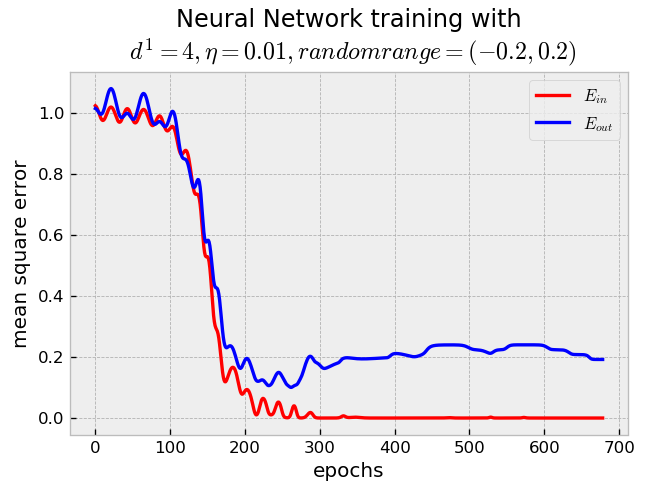


---------------------------

Run number 2

Initializing network...


Starting training...

last 10 E_in values:  [4.6542780921637034e-15, 3.4241705535319098e-15, 2.5174190967568934e-15, 1.8495066683815715e-15, 1.3578746947584639e-15, 9.9625398862585719e-16, 7.304495161914649e-16, 5.3520882434950055e-16, 3.9189744039819651e-16, 2.8677472428408345e-16]


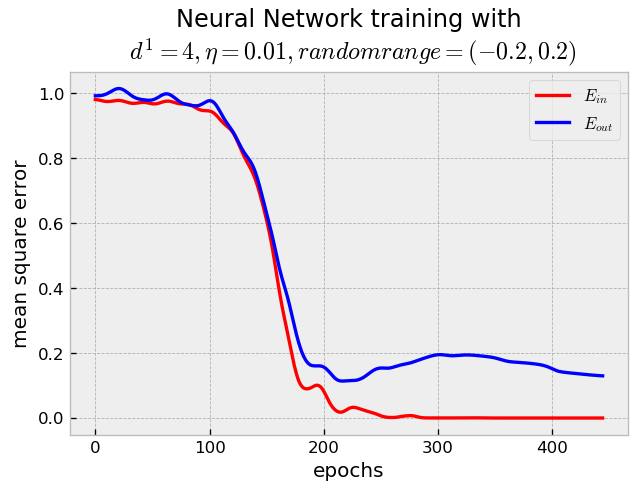


---------------------------

Run number 3

Initializing network...


Starting training...

last 10 E_in values:  [7.838493375836278e-06, 7.6728590437581017e-06, 7.5105033613666417e-06, 7.3513682432794647e-06, 7.1953964306257055e-06, 7.0425314850408156e-06, 6.8927177825465366e-06, 6.7459005073227046e-06, 6.6020256453739026e-06, 6.461039978093108e-06]


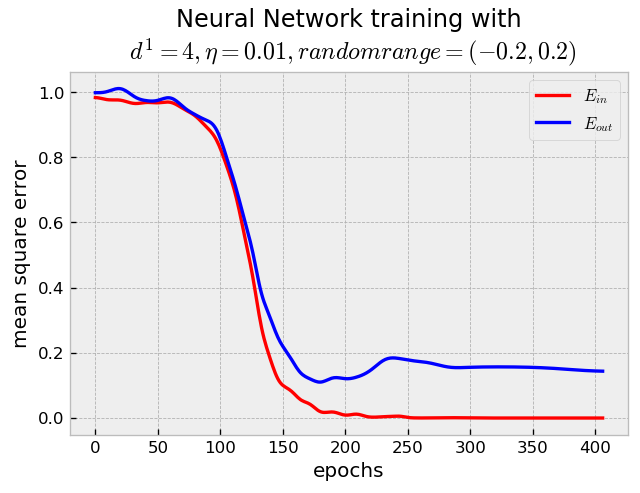


---------------------------

Run number 4

Initializing network...


Starting training...

last 10 E_in values:  [2.0884607192952303e-20, 1.9703521484260461e-20, 1.8591998225205994e-20, 1.7545773828112403e-20, 1.6560861276938192e-20, 1.5633531414716132e-20, 1.4760280416794211e-20, 1.3937827022345197e-20, 1.3163107141315544e-20, 1.2433239305478811e-20]


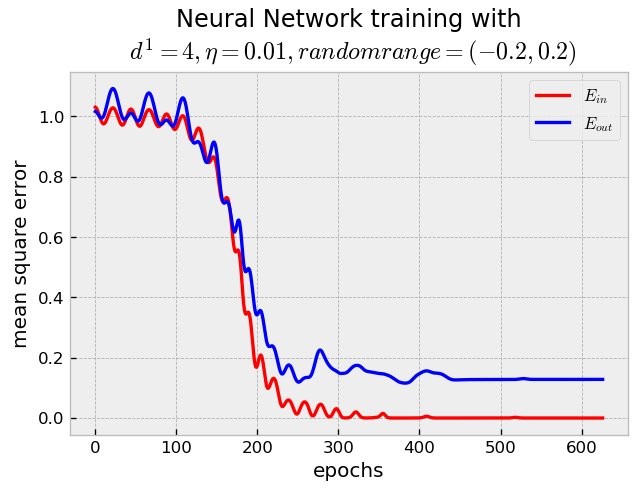


---------------------------

Run number 5

Initializing network...


Starting training...

last 10 E_in values:  [2.6745535522525653e-08, 2.5626419583704696e-08, 2.4553821546898762e-08, 2.3525825212717484e-08, 2.2540592360150993e-08, 2.1596359624402267e-08, 2.0691435497112635e-08, 1.9824197444253854e-08, 1.8993089137218195e-08, 1.819661779276496e-08]


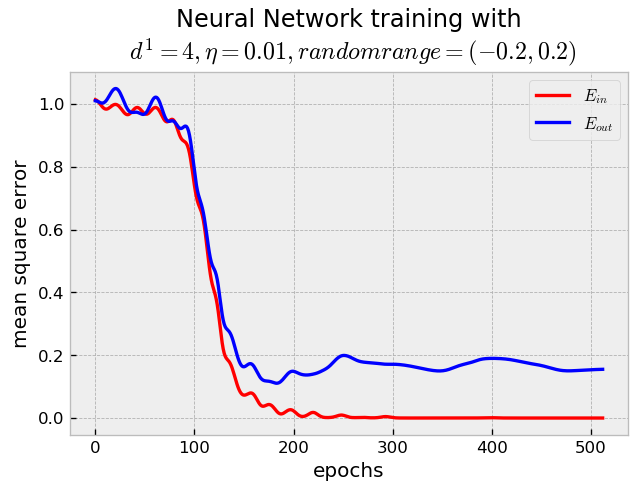

In [9]:
def testing_d1_equals_4():
    for i in range(5):
        print("\n---------------------------\n")
        print("Run number {}".format(i+1))
        extra_problem(d1 = 4, eta = 0.01, rand_range = 0.2)


testing_d1_equals_4()

## 8. Plots for different parameters

**1a. Textbook plot**

I chose $d^{(1)}= 4$, $\eta = 0.01$ and the range for the random weights as $(-0.02, 0.02)$. I call this the textbook example because I think this is what you typically find in textbooks. You can see that after 200 epochs overfitting occurs.

![1a](neural_network_plots/1a_textbook_example_overfitting.png)

___

**1b. A little wiggly**

Here is a plot generated with the same parameters, however the curves don't look so smooth as in the previous plot.

![1b](neural_network_plots/1b_same_parameters_not_so_smooth.png)

___

**2a. Increasing the range to (-2,2) for the random weights**

Increasing the range to $(-2,2)$ for the random weights results in these wiggly curves.

![2a](neural_network_plots/2a_increasing_range_random_weights.png)

___

**2b. Increasing the range to (-2,2) for the random weights**

Another plot with range $(-2,2)$ for the random weights resulting in periodic up and downs. Note that  did not converge to a value near zero.

![2b](neural_network_plots/2b_increasing_range_random_weights.png)

___

**3a. decreasing range for random weights to (-0.02,0.02)**

This plot with the range $(-0.02,0.02)$ for the random weights looks similar to the very first plot. You can see that overfitting occurs at about 360 epochs.

![3a](neural_network_plots/3a_decreasing_range_random_weights.png)

___

**4a. Decreasing the number of neurons in the hidden layer to 2**

Here we have only $d^{(1)} = 2$ neurons in the hidden layer. The curves look very smooth, and overfitting occurs at about 170 epochs.

![4a](neural_network_plots/4a_decreasing_neurons_hidden_layer.png)

___

**5a. Decreasing the number of neurons in the hidden layer to 1**

Here we have a single neuron in the hidden layer. We can see periodic oscillations. Also note that the error $E_{in}$ does not converge to a value near zero.

![5a](neural_network_plots/5a_decreasing_neurons_hidden_layer_to_1.png)

In [10]:
def miscellaneous():

    print(np.zeros((5,3)))

    foo = np.array([[ 0.99616596]])
    print()
    print(foo[0][0])

    A = [1, 2, 3, 4, 5, 6]
    print()
    print(A[-3:])

    print()
    print(all([val > 3 for val in  A[-3:]]))


miscellaneous()

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

0.99616596

[4, 5, 6]

True
